In [51]:
import pandas as pd
import numpy as np

In [70]:
df = pd.read_csv('/Users/areum/Documents/ISLR/Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)

In [71]:
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [72]:
# Lag1~5: the percentage returns for each of the five previous trading days
# Volume: the number of shares traded on the previous day, in billion

In [73]:
df.columns

Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction'], dtype='object')

In [74]:
df.shape

(1250, 8)

In [75]:
df.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [77]:
df.corr()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Lag1,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


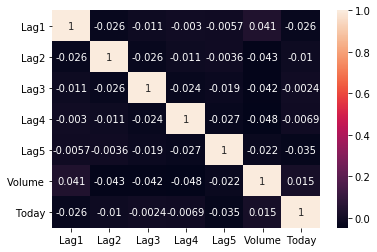

In [78]:
sns.heatmap(df.corr(), cmap=None, annot=True)

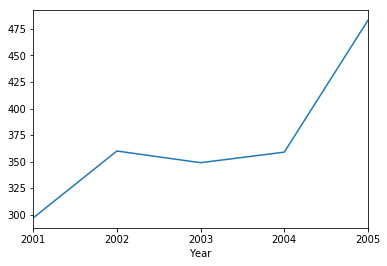

In [79]:
df.groupby('Year')['Volume'].sum().plot()

## 4.6.2 Logistic Regression

In [80]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [81]:
df.columns

Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction'], dtype='object')

In [82]:
formula = 'Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume'

In [83]:
mod1 = smf.glm(formula=formula, data=df, family=sm.families.Binomial()).fit()
print(mod1.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Wed, 14 Mar 2018   Deviance:                       1727.6
Time:                                          22:14:05   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

In [84]:
print("Coefficients")
mod1.params

Coefficients


Intercept    0.126000
Lag1         0.073074
Lag2         0.042301
Lag3        -0.011085
Lag4        -0.009359
Lag5        -0.010313
Volume      -0.135441
dtype: float64

In [85]:
print("p-values")
mod1.pvalues

p-values


Intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [86]:
print("Dependent Variables")
mod1.model.endog_names

Dependent Variables


['Direction[Down]', 'Direction[Up]']

In [87]:
results = mod1.predict()
mod1.predict()[0:10]

array([ 0.49291587,  0.51853212,  0.51886117,  0.48477764,  0.48921884,
        0.49304354,  0.50734913,  0.49077084,  0.48238647,  0.51116222])

In [88]:
np.column_stack((df.as_matrix(columns=['Direction']).flatten(), mod1.model.endog))

array([['Up', 0.0],
       ['Up', 0.0],
       ['Down', 1.0],
       ..., 
       ['Up', 0.0],
       ['Down', 1.0],
       ['Down', 1.0]], dtype=object)

In [89]:
predictions_nominal = ['Up' if x < 0.5 else "Down" for x in results]

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
print(confusion_matrix(df['Direction'], predictions_nominal))

[[145 457]
 [141 507]]


In [92]:
print(classification_report(df['Direction'], predictions_nominal, digits=3))

             precision    recall  f1-score   support

       Down      0.507     0.241     0.327       602
         Up      0.526     0.782     0.629       648

avg / total      0.517     0.522     0.483      1250



## Train-Test Model

In [97]:
X_train = df[:'2004'][:]
y_train = df[:'2004']['Direction']

In [99]:
X_test = df['2005':][:]
y_test = df['2005':]['Direction']

In [100]:
mod2 = smf.glm(formula=formula, data=X_train, family=sm.families.Binomial())
results = mod2.fit()

In [101]:
test_pred = results.predict(X_test)
pred_nominal = ['Up' if x > 0.5 else 'Down' for x in test_pred]

In [104]:
print(classification_report(y_test, pred_nominal, digits=3))

             precision    recall  f1-score   support

       Down      0.436     0.306     0.360       111
         Up      0.557     0.688     0.616       141

avg / total      0.504     0.520     0.503       252



# Refit Model with Lag1 & Lag2

In [105]:
formula2 = 'Direction ~ Lag1+Lag2'
mod3 = smf.glm(formula=formula2, data=X_train, family=sm.families.Binomial())
results2 = mod3.fit()

In [109]:
test_pred2 = results2.predict(X_test)
pred_nominal2 = ['Up' if x < 0.5 else 'Down' for x in test_pred2]

In [110]:
print(classification_report(y_test, pred_nominal2, digits=3))

             precision    recall  f1-score   support

       Down      0.500     0.315     0.387       111
         Up      0.582     0.752     0.656       141

avg / total      0.546     0.560     0.538       252



## Predict on Certain Xs

In [112]:
print(results2.predict(pd.DataFrame([[1.2,1.1],[1.5,-0.8]], columns=['Lag1', 'Lag2'])))

0    0.520854
1    0.503906
dtype: float64
